In [3]:
# 1️⃣ Imports essential libraries for data manipulation (pandas), numerical computations (numpy), and visualization (seaborn, matplotlib).
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
#Reads the dataset from a CSV file into a pandas DataFrame.
df=pd.read_csv("Zomato-data-.csv")
df
#Observation: The filename suggests it contains Zomato-related data. However, the filename has an extra hyphen, which might cause issues if the actual file name differs.

,name,online_order,book_table,rate,RATING,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,3.7,88,300,Buffet
4,Grand Village,No,No,3.8/5,3.8,166,600,Buffet
...,...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3/5,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,4.0,771,450,Dining
146,Darbar,No,No,3.0/5,3.0,98,800,Dining


In [5]:
# Display first 5 rows
df.head()  # Shows first 5 rows to get an overview of data

,name,online_order,book_table,rate,RATING,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,3.7,88,300,Buffet
4,Grand Village,No,No,3.8/5,3.8,166,600,Buffet


In [6]:
# Check data types
df.info()  # Shows column data types, non-null counts
#Observation: Helps identify missing values and understand data types for preprocessing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    object 
 4   RATING                       148 non-null    float64
 5   votes                        148 non-null    int64  
 6   approx_cost(for two people)  148 non-null    int64  
 7   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.4+ KB


In [7]:
# Summary statistics of numerical columns
df.describe()  # Gives count, mean, std, min, max, etc.
#Observation: Useful for understanding the distribution and detecting outliers.

,RATING,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [8]:
# Check missing values
df.isnull().sum()  # Shows total missing values per column
#Observation: Removal is NOT needed.

name                           0
online_order                   0
book_table                     0
rate                           0
RATING                         0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [9]:
# Convert online_order column to numeric: Yes=1, no=o
df['online_order'] = df['online_order'].map({"Yes":1, "No":0})
df.head()
#Observation: This transformation is useful for machine learning models.

,name,online_order,book_table,rate,RATING,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,Yes,4.1/5,4.1,775,800,Buffet
1,Spice Elephant,1,No,4.1/5,4.1,787,800,Buffet
2,San Churro Cafe,1,No,3.8/5,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,No,3.7/5,3.7,88,300,Buffet
4,Grand Village,0,No,3.8/5,3.8,166,600,Buffet


In [10]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    int64  
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    object 
 4   RATING                       148 non-null    float64
 5   votes                        148 non-null    int64  
 6   approx_cost(for two people)  148 non-null    int64  
 7   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 9.4+ KB


In [11]:
#Converts the rate column into a categorical data type.
df['rate'] = df['rate'].astype('category')
df
#Observation: This optimizes memory usage and helps in categorical analysis.

,name,online_order,book_table,rate,RATING,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,Yes,4.1/5,4.1,775,800,Buffet
1,Spice Elephant,1,No,4.1/5,4.1,787,800,Buffet
2,San Churro Cafe,1,No,3.8/5,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,No,3.7/5,3.7,88,300,Buffet
4,Grand Village,0,No,3.8/5,3.8,166,600,Buffet
...,...,...,...,...,...,...,...,...
143,Melting Melodies,0,No,3.3/5,3.3,0,100,Dining
144,New Indraprasta,0,No,3.3/5,3.3,0,150,Dining
145,Anna Kuteera,1,No,4.0/5,4.0,771,450,Dining
146,Darbar,0,No,3.0/5,3.0,98,800,Dining


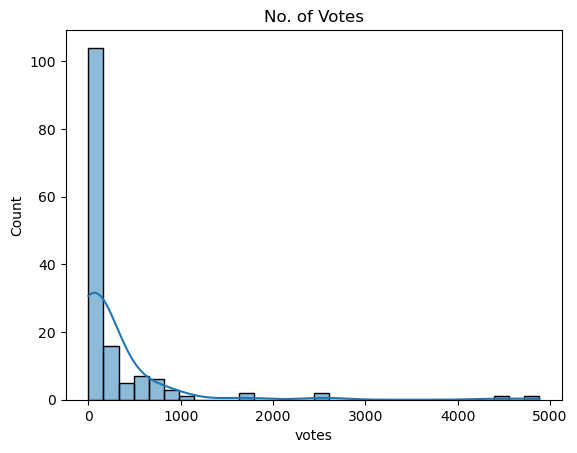

In [12]:
# Histogram for votes
sns.histplot(df['votes'], bins=30, kde=True)
plt.title("No. of Votes")
plt.show()
#Observation: Helps visualize how votes are distributed among restaurants.

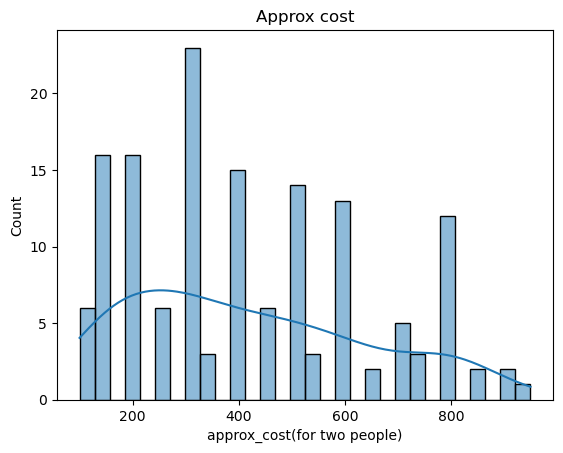

In [13]:
# Histogram for Approx cost
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True)
plt.title("Approx cost")
plt.show()
#Observation: Useful for understanding pricing trends.

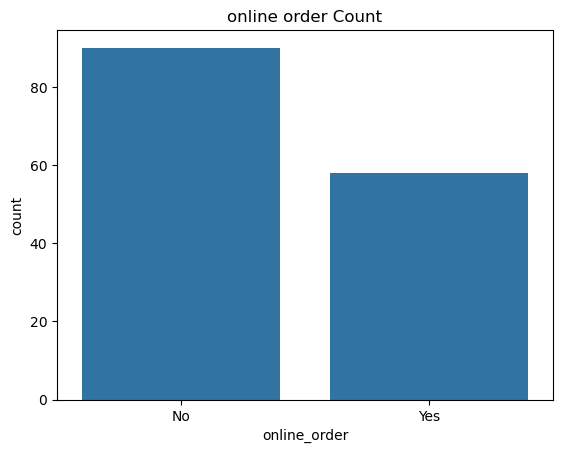

In [14]:
# Bar plot for Online order Count.
sns.countplot(x='online_order', data=df)
plt.title("online order Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
#Observation: Gives a clear view of how many restaurants allow online orders.

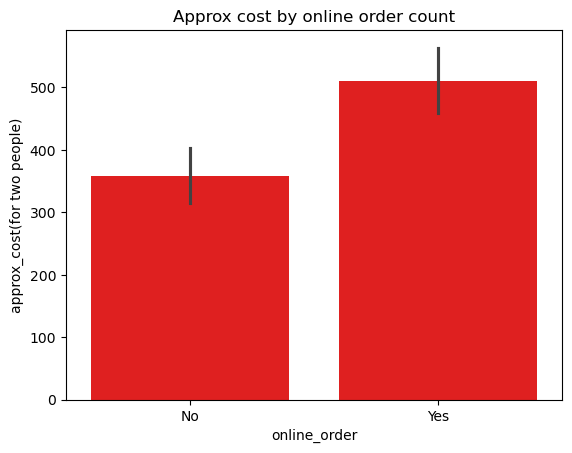

In [15]:
# Approx cost by online order count
sns.barplot(x='online_order', y='approx_cost(for two people)', data=df,color='red')
plt.title("Approx cost by online order count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
#Observation: Helps understand if online-order-enabled restaurants have higher or lower pricing.

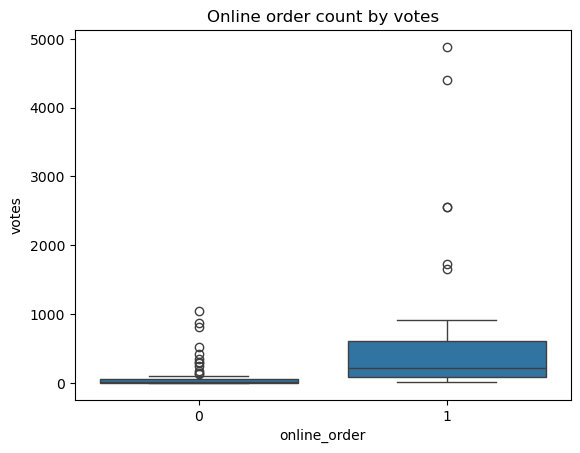

In [16]:
# Boxplot of online order count by votes
sns.boxplot(y='votes', x='online_order', data=df)
plt.title("Online order count by votes")
plt.show()
#Observation: Can reveal whether restaurants offering online orders receive more customer engagement.

In [17]:
# Convert online_order column to numeric: Yes=1, No=0
df['book_table'] = df['book_table'].map({"Yes":1, "No":0})
df.head()
#Observation: Standardizes data for easier analysis.

,name,online_order,book_table,rate,RATING,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1/5,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1/5,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8/5,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7/5,3.7,88,300,Buffet
4,Grand Village,0,0,3.8/5,3.8,166,600,Buffet


     online_order  book_table  RATING   votes  approx_cost(for two people)
0               1           1      4.1    775                          800
1               1           0      4.1    787                          800
2               1           0      3.8    918                          800
3               0           0      3.7     88                          300
4               0           0      3.8    166                          600
..            ...         ...      ...    ...                          ...
143             0           0      3.3      0                          100
144             0           0      3.3      0                          150
145             1           0      4.0    771                          450
146             0           0      3.0     98                          800
147             1           0      3.9     47                          200

[148 rows x 5 columns]


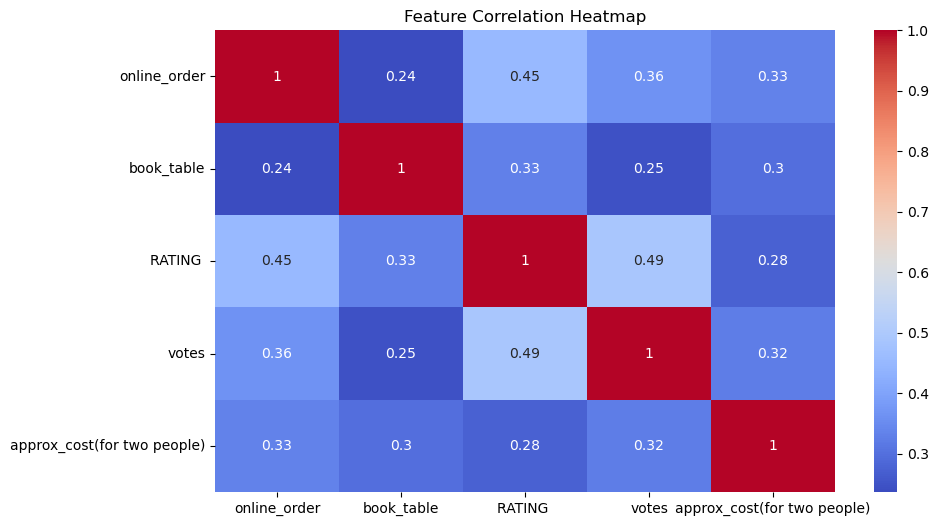

In [18]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df)
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
#Observation: Identifies strong and weak correlations between features.

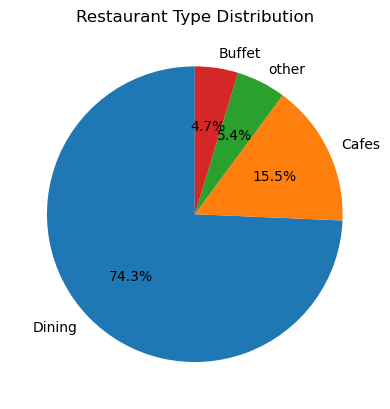

In [19]:
# Pie Chart for % of listed types in Zomato
listed_in = df['listed_in(type)'].value_counts()
plt.pie(listed_in, labels=['Dining', 'Cafes','other','Buffet'],autopct='%1.1f%%', startangle=90)
plt.title("Restaurant Type Distribution")
plt.show()
#Observation: The pie chart shows that Dining types are more.

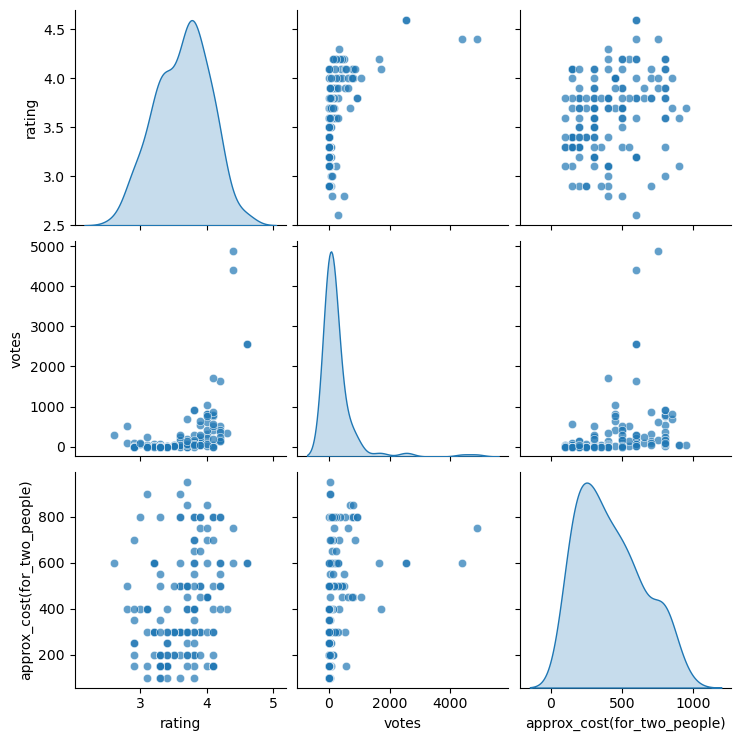


Key Findings from the Pair Plot
1️⃣Positive Correlation Between Votes and Rating:
Restaurants with higher ratings generally have more votes.
This suggests that popular restaurants (more votes) tend to receive better ratings.
2️⃣Weak or No Clear Correlation Between Rating and Cost:
The cost for two people does not strongly influence ratings.
Some expensive restaurants have low ratings, while some affordable ones have high ratings.
3️⃣Votes and Cost for Two People Show Some Relationship:
Higher-priced restaurants tend to get more votes, indicating that well-known or premium restaurants attract more customer engagement.


In [20]:
# Standardize column names (remove spaces and lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Selecting numerical columns for pair plot
num_cols = ['rating', 'votes', 'approx_cost(for_two_people)']

# Creating the pair plot
sns.pairplot(df[num_cols], diag_kind='kde', plot_kws={'alpha': 0.7})

# Display the plot
plt.show()

# ✅ Final Insights
print("\nKey Findings from the Pair Plot")
print("1️⃣Positive Correlation Between Votes and Rating:")
print("Restaurants with higher ratings generally have more votes.")
print("This suggests that popular restaurants (more votes) tend to receive better ratings.")

print("2️⃣Weak or No Clear Correlation Between Rating and Cost:")

print("The cost for two people does not strongly influence ratings.")
print("Some expensive restaurants have low ratings, while some affordable ones have high ratings.")
print("3️⃣Votes and Cost for Two People Show Some Relationship:")
print("Higher-priced restaurants tend to get more votes, indicating that well-known or premium restaurants attract more customer engagement.")




In [21]:
#Converts the rating column into a numeric format.
#Handles errors by coercing non-numeric values to NaN.
#Rounds values and converts them to integer format.

df['rating'] = pd.to_numeric(df['rating'], errors='coerce').round().astype('int64')
df
#Observation: Ensures the rating column is properly formatted for analysis.

,name,online_order,book_table,rate,rating,votes,approx_cost(for_two_people),listed_in(type)
0,Jalsa,1,1,4.1/5,4,775,800,Buffet
1,Spice Elephant,1,0,4.1/5,4,787,800,Buffet
2,San Churro Cafe,1,0,3.8/5,4,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7/5,4,88,300,Buffet
4,Grand Village,0,0,3.8/5,4,166,600,Buffet
...,...,...,...,...,...,...,...,...
143,Melting Melodies,0,0,3.3/5,3,0,100,Dining
144,New Indraprasta,0,0,3.3/5,3,0,150,Dining
145,Anna Kuteera,1,0,4.0/5,4,771,450,Dining
146,Darbar,0,0,3.0/5,3,98,800,Dining


In [22]:
# Feature Engineering
# Creates a new column booking_feature by summing online_order and book_table.
df['booking_feature'] = df['online_order'] + df['book_table']
df.head()
# If a restaurant offers both, the value will be 2; if neither, it will be 0.
# Observation: Helps analyze the impact of online booking and table reservation features together.

,name,online_order,book_table,rate,rating,votes,approx_cost(for_two_people),listed_in(type),booking_feature
0,Jalsa,1,1,4.1/5,4,775,800,Buffet,2
1,Spice Elephant,1,0,4.1/5,4,787,800,Buffet,1
2,San Churro Cafe,1,0,3.8/5,4,918,800,Buffet,1
3,Addhuri Udupi Bhojana,0,0,3.7/5,4,88,300,Buffet,0
4,Grand Village,0,0,3.8/5,4,166,600,Buffet,0


In [23]:
# Create Category Feature
df['Category'] = pd.cut(df['rating'], bins=[0, 3.5, 3.9, 4.4, 5.0],
                          labels= ["Below Average", "Average", "Good", "Excellent"])
df
# Observation: Categorizes restaurants based on ratings using defined bins.
# Helps in segmenting restaurants into meaningful groups for better insights.

,name,online_order,book_table,rate,rating,votes,approx_cost(for_two_people),listed_in(type),booking_feature,Category
0,Jalsa,1,1,4.1/5,4,775,800,Buffet,2,Good
1,Spice Elephant,1,0,4.1/5,4,787,800,Buffet,1,Good
2,San Churro Cafe,1,0,3.8/5,4,918,800,Buffet,1,Good
3,Addhuri Udupi Bhojana,0,0,3.7/5,4,88,300,Buffet,0,Good
4,Grand Village,0,0,3.8/5,4,166,600,Buffet,0,Good
...,...,...,...,...,...,...,...,...,...,...
143,Melting Melodies,0,0,3.3/5,3,0,100,Dining,0,Below Average
144,New Indraprasta,0,0,3.3/5,3,0,150,Dining,0,Below Average
145,Anna Kuteera,1,0,4.0/5,4,771,450,Dining,1,Good
146,Darbar,0,0,3.0/5,3,98,800,Dining,0,Below Average


In [24]:
# Define bin edges and labels
bins = [0, 3.5, 3.9, 4.4, 5.0]  # Rating ranges
labels = ["Below Average", "Average", "Good", "Excellent"]  # Corresponding categories

# Create 'Category' column using pd.cut
df['Category'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

# Display updated dataset
df[['name', 'rating', 'Category']]

# Observation: Re-defines the Category column by segmenting ratings into meaningful groups.
# Ensures that ratings are classified correctly into Below Average, Average, Good, and Excellent.


,name,rating,Category
0,Jalsa,4,Good
1,Spice Elephant,4,Good
2,San Churro Cafe,4,Good
3,Addhuri Udupi Bhojana,4,Good
4,Grand Village,4,Good
...,...,...,...
143,Melting Melodies,3,Below Average
144,New Indraprasta,3,Below Average
145,Anna Kuteera,4,Good
146,Darbar,3,Below Average


In [25]:
# Observation: Displays the updated dataset structure to verify recent changes.
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   name                         148 non-null    object  
 1   online_order                 148 non-null    int64   
 2   book_table                   148 non-null    int64   
 3   rate                         148 non-null    category
 4   rating                       148 non-null    int64   
 5   votes                        148 non-null    int64   
 6   approx_cost(for_two_people)  148 non-null    int64   
 7   listed_in(type)              148 non-null    object  
 8   booking_feature              148 non-null    int64   
 9   Category                     148 non-null    category
dtypes: category(2), int64(6), object(2)
memory usage: 10.6+ KB


,name,online_order,book_table,rate,rating,votes,approx_cost(for_two_people),listed_in(type),booking_feature,Category
0,Jalsa,1,1,4.1/5,4,775,800,Buffet,2,Good
1,Spice Elephant,1,0,4.1/5,4,787,800,Buffet,1,Good
2,San Churro Cafe,1,0,3.8/5,4,918,800,Buffet,1,Good
3,Addhuri Udupi Bhojana,0,0,3.7/5,4,88,300,Buffet,0,Good
4,Grand Village,0,0,3.8/5,4,166,600,Buffet,0,Good
...,...,...,...,...,...,...,...,...,...,...
143,Melting Melodies,0,0,3.3/5,3,0,100,Dining,0,Below Average
144,New Indraprasta,0,0,3.3/5,3,0,150,Dining,0,Below Average
145,Anna Kuteera,1,0,4.0/5,4,771,450,Dining,1,Good
146,Darbar,0,0,3.0/5,3,98,800,Dining,0,Below Average


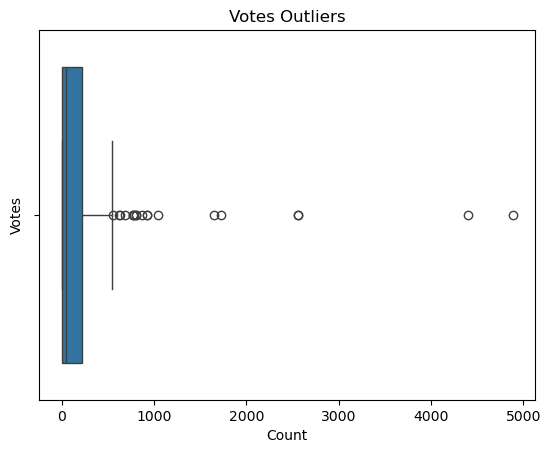

In [26]:
# Outlier Detection
# Boxplot for Fare
sns.boxplot(x=df['votes'])
plt.title("Votes Outliers")
plt.xlabel("Count")
plt.ylabel("Votes")
plt.show()
# Observation: Identifies restaurants that receive an unusually high or low number of votes.

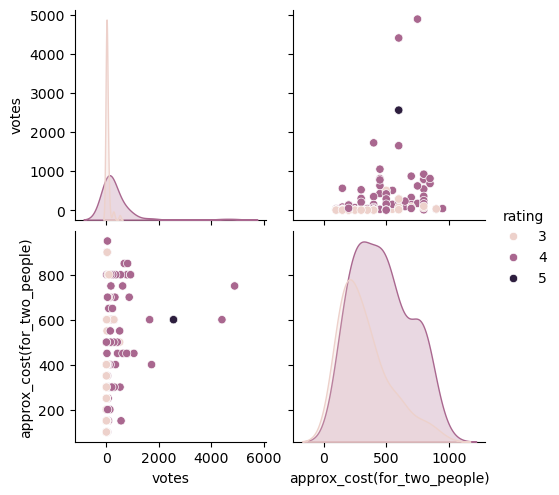

Business Insights
📌 Marketing Strategies: High-rated restaurants should leverage their popularity through customer engagement campaigns (e.g., reviews & referrals).
📌 Pricing & Popularity: Price is not the sole factor affecting ratings; maintaining quality and service matters more.
📌 Customer Preferences: Well-rated restaurants often have a high number of votes, indicating that a strong customer base leads to better visibility.


In [27]:
sns.pairplot(df[['rating', 'votes', 'approx_cost(for_two_people)']], hue='rating')
plt.show()
# Observation: Creates a pair plot with different rating groups.
#              Highlights useful strategies for marketing and pricing.

print("Business Insights")
print("📌 Marketing Strategies: High-rated restaurants should leverage their popularity through customer engagement campaigns (e.g., reviews & referrals).")
print("📌 Pricing & Popularity: Price is not the sole factor affecting ratings; maintaining quality and service matters more.")
print("📌 Customer Preferences: Well-rated restaurants often have a high number of votes, indicating that a strong customer base leads to better visibility.")

In [28]:
# Perform One-Hot Encoding
df = pd.get_dummies(df, columns=['online_order', 'book_table'], drop_first=True)

# Display updated DataFrame
df.head()
# Observation: Converts categorical columns (online_order, book_table) into numeric dummy variables.
#             Drops one of the categories (drop_first=True) to avoid multicollinearity.

,name,rate,rating,votes,approx_cost(for_two_people),listed_in(type),booking_feature,Category,online_order_1,book_table_1
0,Jalsa,4.1/5,4,775,800,Buffet,2,Good,True,True
1,Spice Elephant,4.1/5,4,787,800,Buffet,1,Good,True,False
2,San Churro Cafe,3.8/5,4,918,800,Buffet,1,Good,True,False
3,Addhuri Udupi Bhojana,3.7/5,4,88,300,Buffet,0,Good,False,False
4,Grand Village,3.8/5,4,166,600,Buffet,0,Good,False,False
